# Wine Dataset

In [1]:
import sys  
sys.path.insert(0, '../')
import deep_forest
import torch as th
from torch import nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi
import seaborn as sns
from preprocess import get_data
from tqdm import tqdm
sns.set_theme("notebook")
sns.set_style('whitegrid')

## Get Data

In [2]:
x, y, test_data, test_labels = get_data(100)

## Deep Forest

In [3]:
model = deep_forest.DeepForest(100, 2, 13, 0.25, 10)

In [4]:
optimizer = th.optim.Adam(model.parameters())
pbar = tqdm(range(2500))
for i in pbar:
    model.populate_best(x, y)
    optimizer.zero_grad()

    loss = model.loss(x, y)
    loss.backward()
    optimizer.step()

    pbar.set_description("EPOCH %d || Acc: %s || Loss: %s" % (i, str(th.mean((model.forward(x[:, :]) == y[:]).float())), str(loss)))

print("\n==============\nFINAL ACC: %s" % str(th.mean((model.forward(x) == y).float())))

  0%|          | 0/2500 [00:00<?, ?it/s]Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
EPOCH 2499 || Acc: tensor(0.9888) || Loss: tensor([632.3503], grad_fn=<AddBackward0>):   0%|          | 0/2500 [23:51<?, ?it/s]


FINAL ACC: tensor(0.9888)


In [ ]:
imp = model.compute_importance(x)
print()
print(imp)

Text(0.5, 1.0, 'Wine Deep Forest Importance')

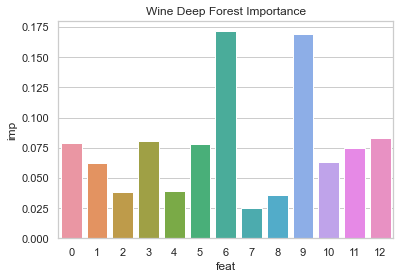

In [6]:
import pandas as pd
data = pd.DataFrame({"feat": list(imp.keys()), "imp": list(imp.values())})
sns.barplot(x="feat", y="imp", data=data).set_title("Wine Deep Forest Importance")

## MLP Baseline

In [ ]:
mlp = nn.Sequential(
    nn.Linear(13, 30),
    nn.LeakyReLU(),
    nn.Linear(30, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 3),
    nn.Softmax()
)

optimizer = th.optim.Adam(mlp.parameters())
pbar = tqdm(range(1000))
for i in pbar:
    optimizer.zero_grad()

    preds = mlp(x)
    loss = nn.functional.cross_entropy(preds, y)
    loss.backward()
    optimizer.step()

    pbar.set_description("EPOCH %d || Acc: %s || Loss: %s" % (i, str(th.mean((th.argmax(mlp(x), 1) == y).float())), str(loss)))

print("\n\n==============\nFINAL ACC: %s" % str(th.mean((th.argmax(mlp(x[:]), 1) == y[:]).float())))

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2)
clf.fit(x.numpy(), y.numpy())
print(clf.score(x.numpy(), y.numpy()))

0.9831460674157303


Text(0.5, 1.0, 'Wine Random Forest Importance')

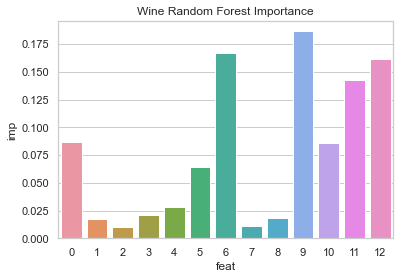

In [11]:
data = pd.DataFrame({"feat": list(range(13)), "imp": clf.feature_importances_})
sns.barplot(x="feat", y="imp", data=data).set_title("Wine Random Forest Importance")